train['Sex'] = train['Sex'].map({  'male':1 , 'female':0   })
train['Embarked'] = train['Embarked'].map({ 'S':0, 'C':1, 'Q':2  })

train['Embarked'] = train['Embarked'].fillna( -1 )
train['Age'] = train['Age'].fillna( -1 )

clf = RandomForestClassifier( max_depth=4 , max_features=5 , n_estimators=1000 )
X = train[ ['Pclass', 'Age', 'SibSp', 'Parch','Sex' ,'Fare','Embarked'] ]
y = train['Survived']
clf.fit(X,y)

test['Sex'] = test['Sex'].map({  'male':1 , 'female':0   })
test['Embarked'] = test['Embarked'].map({ 'S':0, 'C':1, 'Q':2  })

test['Embarked'] = test['Embarked'].fillna(-1)
test['Age'] = test['Age'].fillna( -1 )
test['Fare'] = test['Fare'].fillna( -1 )

X_test = test[ ['Pclass', 'Age', 'SibSp', 'Parch','Sex' ,'Fare','Embarked'] ]

test['Survived']=clf.predict_proba(X_test)[:,1]

test[['PassengerId','Survived']].to_csv("rf_first.csv",index=False)

train.columns

train['Cabin']=train['Cabin'].str.slice(0,1)
train['Cabin']=train['Cabin'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7})
train['Cabin']=train['Cabin'].fillna(-1)

test['Cabin']=test['Cabin'].str.slice(0,1)
test['Cabin']=test['Cabin'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7})
test['Cabin']=test['Cabin'].fillna(-1)

clf = RandomForestClassifier( max_depth=4 , max_features=5 , n_estimators=1000 )
X = train[ ['Pclass', 'Age', 'SibSp', 'Parch','Sex' ,'Fare','Embarked','Cabin'] ]
y = train['Survived']
clf.fit(X,y)

X_test = test[ ['Pclass', 'Age', 'SibSp', 'Parch','Sex' ,'Fare','Embarked','Cabin'] ]
test['Survived']=clf.predict_proba(X_test)[:,1]

test[['PassengerId','Survived']].to_csv("FE_first.csv",index=False)

sns.kdeplot(train.loc[train['Survived']==0]['Age'],label='death')
sns.kdeplot(train.loc[train['Survived']==1]['Age'],label='survived')

train['is_young']=((train['Age']<=10)&(train['Age']>=0)).astype(int)
test['is_young']=((test['Age']<=10)&(test['Age']>=0)).astype(int)

clf = RandomForestClassifier( max_depth=4 , max_features=5 , n_estimators=1000 )
X = train[ ['Pclass', 'Age', 'SibSp', 'Parch','Sex' ,'Fare','Embarked','Cabin', 'is_young'] ]
y = train['Survived']
clf.fit(X,y)

X_test = test[ ['Pclass', 'Age', 'SibSp', 'Parch','Sex' ,'Fare','Embarked','Cabin', 'is_young'] ]
test['Survived']=clf.predict_proba(X_test)[:,1]

test[['PassengerId','Survived']].to_csv("FE_first.csv",index=False)

train['family_size']=train['SibSp']+train['Parch']+1
test['family_size']=test['SibSp']+test['Parch']+1

clf = RandomForestClassifier( max_depth=4 , max_features=5 , n_estimators=1000 )
X = train[ ['Pclass', 'Age', 'SibSp', 'Parch','Sex' ,'Fare','Embarked','Cabin', 'is_young', 'family_size'] ]
y = train['Survived']
clf.fit(X,y)

X_test = test[ ['Pclass', 'Age', 'SibSp', 'Parch','Sex' ,'Fare','Embarked','Cabin', 'is_young', 'family_size'] ]
test['Survived']=clf.predict_proba(X_test)[:,1]

test[['PassengerId','Survived']].to_csv("FE_first.csv",index=False)

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.info()

# Age 177 null
# Cabin 687 null
# Embarked 2 null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [ ]:
test.info()

# Age 86 null
# Fare 1 null
# Cabin 326 null

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
train = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv")
test = pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv")

# machine learning
from sklearn.ensemble import RandomForestClassifier

In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
 all_data = [train, test]

# Pclass

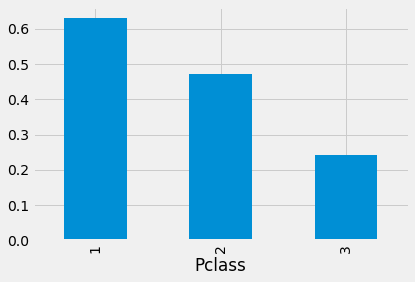

In [ ]:
train.groupby('Pclass')['Survived'].mean().plot.bar()

# 1층이 생존률이 가장 높음

# Name

In [ ]:
train['Name'].value_counts()

# 나중에 특징 뽑아내보자.

Barah, Mr. Hanna Assi                               1
Serepeca, Miss. Augusta                             1
Matthews, Mr. William John                          1
Kimball, Mr. Edwin Nelson Jr                        1
Backstrom, Mr. Karl Alfred                          1
Ridsdale, Miss. Lucy                                1
Goldsmith, Mr. Frank John                           1
Burns, Miss. Elizabeth Margaret                     1
Bishop, Mr. Dickinson H                             1
Sagesser, Mlle. Emma                                1
Sinkkonen, Miss. Anna                               1
Ryan, Mr. Patrick                                   1
Persson, Mr. Ernst Ulrik                            1
Leyson, Mr. Robert William Norman                   1
Mannion, Miss. Margareth                            1
Jansson, Mr. Carl Olof                              1
Betros, Mr. Tannous                                 1
Reynaldo, Ms. Encarnacion                           1
Mernagh, Mr. Robert         

# Sex

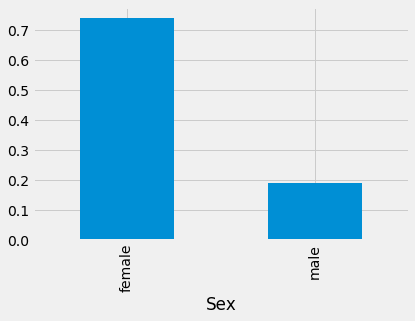

In [ ]:
train.groupby('Sex')['Survived'].mean().plot.bar()

# 여성의 생존률이 압도적으로 높음

## Sex astype(int)

In [ ]:
for data in all_data:
    data['Sex'] = data['Sex'].map({  'male':1 , 'female':0})

# 카테고리화

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


# Age

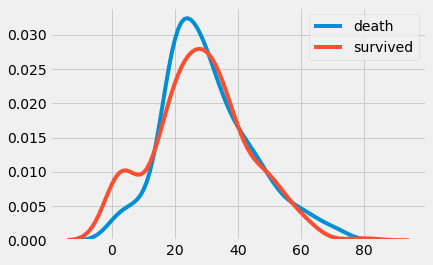

In [ ]:
sns.kdeplot(train.loc[train['Survived']==0]['Age'].dropna(),label='death')
sns.kdeplot(train.loc[train['Survived']==1]['Age'].dropna(),label='survived')

# 40세 이하인 사람들이 사망률이 높음
# null 값을 다른 특성들과 연관있는지 살펴보고 채워놓자.

# SibSp

In [ ]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

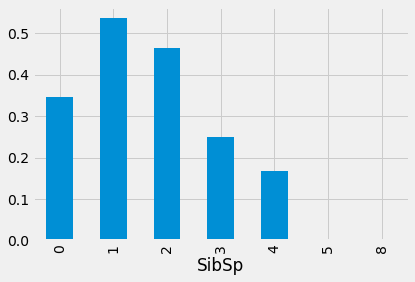

In [ ]:
train.groupby('SibSp')['Survived'].mean().plot.bar()

# 혼자일수록 사망률 높음

# Parch

In [ ]:
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

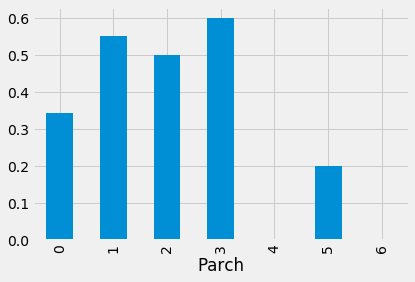

In [ ]:
train.groupby('Parch')['Survived'].mean().plot.bar()

# 1, 3일때 사망률 높음

## FamilySize 생성

In [ ]:
for data in all_data:
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1


In [ ]:
train['FamilySize'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

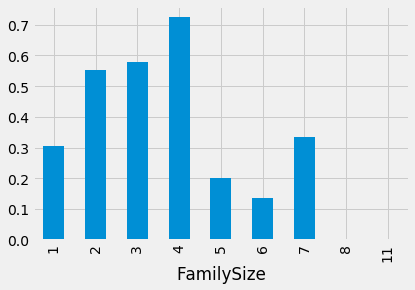

In [ ]:
train.groupby('FamilySize')['Survived'].mean().plot.bar()

# 8과 11의 생존률 똑같음

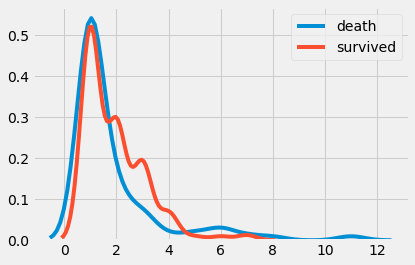

In [ ]:
sns.kdeplot(train.loc[train['Survived']==0]['FamilySize'],label='death')
sns.kdeplot(train.loc[train['Survived']==1]['FamilySize'],label='survived')

In [ ]:
for data in all_data:
    data.loc[data['FamilySize'] == 11, 'FamilySize'] = 8

In [ ]:
train['FamilySize'].value_counts()

1    537
2    161
3    102
4     29
6     22
5     15
8     13
7     12
Name: FamilySize, dtype: int64

## FamilySize: feature engineering

In [ ]:
for data in all_data:
    data['Alone'] = (data['FamilySize'] == 1).astype(int)

all_data = [train ,test]

### First Name Extract

- 같은 가족이면 같은 First Name.


In [ ]:
train[train['FamilySize'] == 8]['Name']

59          Goodwin, Master. William Frederick
71                  Goodwin, Miss. Lillian Amy
159                 Sage, Master. Thomas Henry
180               Sage, Miss. Constance Gladys
201                        Sage, Mr. Frederick
324                   Sage, Mr. George John Jr
386            Goodwin, Master. Sidney Leonard
480             Goodwin, Master. Harold Victor
678    Goodwin, Mrs. Frederick (Augusta Tyler)
683                Goodwin, Mr. Charles Edward
792                    Sage, Miss. Stella Anna
846                   Sage, Mr. Douglas Bullen
863          Sage, Miss. Dorothy Edith "Dolly"
Name: Name, dtype: object

In [ ]:
train[train['FamilySize'] == 7]['Name']

13                           Andersson, Mr. Anders Johan
25     Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...
68                       Andersson, Miss. Erna Alexandra
119                    Andersson, Miss. Ellis Anna Maria
182                Asplund, Master. Clarence Gustaf Hugo
233                       Asplund, Miss. Lillian Gertrud
261                    Asplund, Master. Edvin Rojj Felix
541                 Andersson, Miss. Ingeborg Constanzia
542                    Andersson, Miss. Sigrid Elisabeth
610    Andersson, Mrs. Anders Johan (Alfrida Konstant...
813                   Andersson, Miss. Ebba Iris Alfrida
850              Andersson, Master. Sigvard Harald Elias
Name: Name, dtype: object

In [ ]:
train[train['FamilySize'] == 6]['Name']

16                                Rice, Master. Eugene
27                      Fortune, Mr. Charles Alexander
50                          Panula, Master. Juha Niilo
63                               Skoog, Master. Harald
88                          Fortune, Miss. Mabel Helen
164                       Panula, Master. Eino Viljami
167    Skoog, Mrs. William (Anna Bernhardina Karlsson)
171                               Rice, Master. Arthur
266                          Panula, Mr. Ernesti Arvid
278                                 Rice, Master. Eric
341                     Fortune, Miss. Alice Elizabeth
360                                 Skoog, Mr. Wilhelm
437              Richards, Mrs. Sidney (Emily Hocking)
438                                  Fortune, Mr. Mark
634                                 Skoog, Miss. Mabel
638             Panula, Mrs. Juha (Maria Emilia Ojala)
642                      Skoog, Miss. Margit Elizabeth
686                           Panula, Mr. Jaako Arnold
787       

# FirstName feature 생성

In [ ]:
# FirstName만 뽑아 카테고리화하자. (1개 이상)
for data in all_data:
    data['FirstName'] = data['Name'].str.extract('([A-Za-z]+)\,', expand = False)

trainvalue = train['FirstName'].value_counts()
trainvalue1 = trainvalue[trainvalue > 1]
trainnotvalue = trainvalue[trainvalue == 1]

In [ ]:
trainvalue1

Andersson       9
Sage            7
Johnson         6
Carter          6
Panula          6
Skoog           6
Goodwin         6
Rice            5
Harris          4
Fortune         4
Brown           4
Smith           4
Lefebre         4
Palsson         4
Jensen          4
Harper          4
Ford            4
Williams        4
Asplund         4
Kelly           4
Gustafsson      4
Baclini         4
Hart            4
West            3
Moran           3
Laroche         3
Impe            3
Hansen          3
Hoyt            3
Richards        3
               ..
Chambers        2
Webber          2
Hocking         2
Chapman         2
Braund          2
Zabour          2
Thorneycroft    2
Oreskovic       2
Wick            2
Beane           2
Frauenthal      2
Hagland         2
McCoy           2
Sandstrom       2
White           2
Abbott          2
Abelson         2
Saad            2
Minahan         2
Quick           2
Bishop          2
Futrelle        2
Nasser          2
Mallet          2
Nakid     

In [ ]:
trainnotvalue

Stoytcheff     1
Sinkkonen      1
Clarke         1
Dakic          1
Meanwell       1
Troupiansky    1
Laitinen       1
Clifford       1
Sdycoff        1
Berriman       1
Partner        1
Aubart         1
Hewlett        1
Velde          1
Bratthammer    1
Guggenheim     1
Barkworth      1
Hodges         1
Lulic          1
Stewart        1
Pickard        1
Moen           1
Alhomaki       1
Cardeza        1
More           1
Drew           1
Garfirth       1
Devaney        1
Behr           1
Collander      1
              ..
Torber         1
Giles          1
Toomey         1
Yousif         1
Gillespie      1
Cohen          1
Leyson         1
Johanson       1
Christy        1
Watson         1
Harrison       1
Andreasson     1
Vestrom        1
Maenpaa        1
Markoff        1
Heilmann       1
Gilinski       1
Lievens        1
Stead          1
Kraeff         1
Berglund       1
Plotcharsky    1
Kent           1
Gilnagh        1
Markun         1
Somerton       1
Molson         1
Hosono        

In [ ]:
testvalue = test['FirstName'].value_counts()
testvalue1 = testvalue[testvalue > 1]
testnotvalue = testvalue[testvalue == 1]

In [ ]:
testvalue1

Asplund      4
Davies       4
Ware         4
Thomas       4
Sage         4
Peacock      3
Ryerson      3
Howard       3
Khalil       3
Widener      2
Smith        2
Warren       2
Karlsson     2
Fortune      2
Touma        2
Spedden      2
Compton      2
Cacic        2
Billiard     2
Jefferys     2
Goodwin      2
Giles        2
Snyder       2
Mahon        2
Dyker        2
Stengel      2
Dodge        2
Clark        2
Foley        2
Cor          2
Douglas      2
Ford         2
Gibson       2
Andersson    2
Herman       2
Phillips     2
Franklin     2
Drew         2
Buckley      2
Becker       2
Straus       2
Klasen       2
Brown        2
Zakarian     2
Samaan       2
Heilmann     2
Abelseth     2
Johnston     2
Hocking      2
Pokrnic      2
Dean         2
Wells        2
Nilsson      2
Name: FirstName, dtype: int64

In [ ]:
testnotvalue

Braf           1
Kennedy        1
Moubarek       1
Torfa          1
Everett        1
Kelly          1
Castello       1
Johansson      1
Davison        1
Sweet          1
Bradley        1
Connor         1
Smyth          1
Cavendish      1
Stanton        1
Roth           1
Deacon         1
Midtsjo        1
Olsson         1
Lines          1
Elias          1
Carver         1
McCaffry       1
Ocana          1
Lockyer        1
Messemaeker    1
Flegenheim     1
Williams       1
Kimball        1
Schabert       1
              ..
Aldworth       1
McCoy          1
Niklasson      1
Riihivouri     1
Denbury        1
Case           1
Enander        1
Nakid          1
Brobeck        1
Wilkes         1
Allison        1
Pedersen       1
Coutts         1
Weisz          1
Chevre         1
McCrae         1
Guest          1
Hiltunen       1
Finoli         1
Lindstrom      1
Veal           1
Holthen        1
Hays           1
McNamee        1
Baccos         1
Keeping        1
Mardirosian    1
Shaughnessy   

In [ ]:
trainnotFirst = set(trainnotvalue.index)
testnotFirst = set(testnotvalue.index)
FirstNameNotTotal = trainnotFirst | testnotFirst
len(FirstNameNotTotal)

762

In [ ]:
FirstNameNotTotal

{'Abbing',
 'Abbott',
 'Abrahamsson',
 'Abrahim',
 'Adahl',
 'Adams',
 'Ahlin',
 'Aks',
 'Albimona',
 'Aldworth',
 'Alexander',
 'Alhomaki',
 'Allison',
 'Allum',
 'Andersen',
 'Anderson',
 'Andreasson',
 'Andrew',
 'Angheloff',
 'Angle',
 'Appleton',
 'Aronsson',
 'Artagaveytia',
 'Ashby',
 'Asim',
 'Assaf',
 'Assam',
 'Astor',
 'Aubart',
 'Augustsson',
 'Ayoub',
 'Baccos',
 'Badman',
 'Badt',
 'Bailey',
 'Baimbrigge',
 'Balkic',
 'Ball',
 'Banfield',
 'Barah',
 'Barber',
 'Barkworth',
 'Barry',
 'Barton',
 'Bateman',
 'Baumann',
 'Bazzani',
 'Beattie',
 'Beauchamp',
 'Beavan',
 'Beesley',
 'Behr',
 'Bengtsson',
 'Bentham',
 'Berglund',
 'Berriman',
 'Betros',
 'Bidois',
 'Billiard',
 'Bing',
 'Bird',
 'Birkeland',
 'Birnbaum',
 'Bissette',
 'Bjorklund',
 'Blackwell',
 'Blank',
 'Blumer',
 'Bonnell',
 'Borebank',
 'Bostandyeff',
 'Botsford',
 'Boulos',
 'Bowen',
 'Bowenur',
 'Bowerman',
 'Bracken',
 'Bradley',
 'Brady',
 'Braf',
 'Brandeis',
 'Bratthammer',
 'Brewe',
 'Brito',
 'Brobe

In [ ]:
trainFirst = set(trainvalue1.index)
testFirst = set(testvalue1.index)
FirstNameTotal = trainFirst | testFirst
len(FirstNameTotal)

170

In [ ]:
FirstNameTotal

{'Abbott',
 'Abelseth',
 'Abelson',
 'Ali',
 'Allen',
 'Allison',
 'Andersson',
 'Andrews',
 'Asplund',
 'Attalah',
 'Backstrom',
 'Baclini',
 'Barbara',
 'Baxter',
 'Beane',
 'Becker',
 'Beckwith',
 'Billiard',
 'Bishop',
 'Boulos',
 'Bourke',
 'Braund',
 'Brien',
 'Brown',
 'Buckley',
 'Cacic',
 'Caldwell',
 'Calic',
 'Carlsson',
 'Carter',
 'Castellana',
 'Chambers',
 'Chapman',
 'Clark',
 'Coleff',
 'Collyer',
 'Compton',
 'Cor',
 'Coutts',
 'Crosby',
 'Daly',
 'Danbom',
 'Davies',
 'Dean',
 'Dick',
 'Dodge',
 'Doling',
 'Douglas',
 'Drew',
 'Dyker',
 'Elias',
 'Flynn',
 'Foley',
 'Ford',
 'Fortune',
 'Franchi',
 'Franklin',
 'Frauenthal',
 'Futrelle',
 'Gibson',
 'Giles',
 'Goldenberg',
 'Goldsmith',
 'Goodwin',
 'Gordon',
 'Graham',
 'Gustafsson',
 'Hagland',
 'Hakkarainen',
 'Hamalainen',
 'Hansen',
 'Harper',
 'Harris',
 'Hart',
 'Hays',
 'Heilmann',
 'Herman',
 'Hickman',
 'Hippach',
 'Hocking',
 'Holverson',
 'Howard',
 'Hoyt',
 'Impe',
 'Jacobsohn',
 'Jefferys',
 'Jensen',
 

In [ ]:
train['Embarked'][train['FirstName'] == 'Andersson']

13     S
68     S
119    S
146    S
541    S
542    S
610    S
813    S
850    S
Name: Embarked, dtype: object

In [ ]:
train['Embarked'][train['FirstName'] == 'Sage']

159    S
180    S
201    S
324    S
792    S
846    S
863    S
Name: Embarked, dtype: object

In [ ]:
train['Embarked'][train['FirstName'] == 'Carter']

249    S
390    S
435    S
763    S
802    S
854    S
Name: Embarked, dtype: object

In [ ]:
train['Embarked'][train['FirstName'] == 'Panula']

50     S
164    S
266    S
638    S
686    S
824    S
Name: Embarked, dtype: object

In [ ]:
train['Embarked'][train['FirstName'] == 'Skoog']

63     S
167    S
360    S
634    S
642    S
819    S
Name: Embarked, dtype: object

In [ ]:
train['Embarked'][train['FirstName'] == 'Rice']

16     Q
171    Q
278    Q
787    Q
885    Q
Name: Embarked, dtype: object

In [ ]:
train['Ticket'][train['FirstName'] == 'Johnson']

8      347742
172    347742
302      LINE
597      LINE
719    347062
869    347742
Name: Ticket, dtype: object

In [ ]:
# FirstName의 값들을 카테고리화하자..
FirstName_map = {}
l1 = list(range(170))
for i, j in enumerate(list(FirstNameTotal)):
    val = l1[i]
    FirstName_map[j] = val

FirstNameNot_map = {}
l2 = list(np.array([-1] * 762))
for i, j in enumerate(list(FirstNameNotTotal)):
    val = l2[i]
    FirstNameNot_map[j] = val
# 딕셔너리 합치기
# 이렇게 안하면 NaN 생성됨 ㅜㅜ
FirstName_map.update(FirstNameNot_map)

print(FirstName_map)

for data in all_data:
    data['FirstName'] = data['FirstName'].map(FirstName_map)

train.head()

{'Baxter': 0, 'Mallet': -1, 'Johnston': 2, 'Baclini': 3, 'Moubarek': -1, 'Kelly': -1, 'Samaan': -1, 'West': -1, 'Futrelle': 8, 'Howard': 9, 'Morley': 10, 'Giles': -1, 'Clark': 12, 'Palsson': -1, 'Brown': 14, 'Gordon': 15, 'Attalah': 16, 'Planke': -1, 'Moor': 18, 'Dyker': 19, 'Snyder': 20, 'Navratil': 21, 'Thayer': 22, 'Yarred': 23, 'Jefferys': 24, 'Bourke': 25, 'Nasser': 26, 'Yasbeck': 27, 'Billiard': -1, 'Cacic': 29, 'Hansen': -1, 'Zakarian': 31, 'Jussila': 32, 'Rice': -1, 'Touma': -1, 'Carter': 35, 'Taussig': 36, 'Frauenthal': -1, 'Braund': 38, 'Heilmann': -1, 'Warren': -1, 'Andrews': 41, 'Ryerson': 42, 'Williams': -1, 'Chambers': 44, 'Brien': 45, 'Khalil': 46, 'Panula': 47, 'Richards': 48, 'Elias': -1, 'Pokrnic': 50, 'Peacock': 51, 'Widener': -1, 'Collyer': 53, 'Stengel': 54, 'Becker': 55, 'Ware': 56, 'Olsen': -1, 'Impe': 58, 'Johansson': -1, 'Franklin': 60, 'Harper': 61, 'Graham': 62, 'Caldwell': -1, 'Silvey': 64, 'Olsson': -1, 'Pears': 66, 'Ford': 67, 'Douglas': -1, 'Cor': -1, 'He

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,FirstName
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,38
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,2,0,-1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,-1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,2,0,8
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,1,1,125


In [ ]:
train['FirstName'].isnull().sum()

0

In [ ]:
test['FirstName'].value_counts()

-1      338
 138      4
 168      4
 74       4
 56       4
 42       3
 46       3
 9        3
 51       3
 14       2
 12       2
 19       2
 20       2
 54       2
 29       2
 31       2
 50       2
 2        2
 24       2
 169      2
 55       2
 67       2
 70       2
 85       2
 91       2
 98       2
 112      2
 128      2
 132      2
 136      2
 140      2
 149      2
 153      2
 157      2
 60       2
Name: FirstName, dtype: int64

## FamilySize - Embarked

In [ ]:
pd.crosstab(train['FamilySize'], train['Embarked'])

Embarked,C,Q,S
FamilySize,,,
1,85,57,393
2,51,9,101
3,23,6,73
4,7,0,22
5,2,0,13
6,0,5,17
7,0,0,12
8,0,0,13


In [ ]:
# 모르겠다
pd.crosstab(train['FamilySize'], train['Cabin'])

Cabin,A10,A14,A16,A19,A20,A23,A24,A26,A31,A32,A34,A36,A5,A6,A7,B101,B102,B18,B19,B20,B22,B28,B3,B30,B35,B37,B38,B39,B4,B41,B42,B49,B5,B50,B51 B53 B55,B57 B59 B63 B66,B58 B60,B69,B71,B73,...,D47,D48,D49,D50,D56,D6,D7,D9,E10,E101,E12,E121,E17,E24,E25,E31,E33,E34,E36,E38,E40,E44,E46,E49,E50,E58,E63,E67,E68,E77,E8,F E69,F G63,F G73,F2,F33,F38,F4,G6,T
FamilySize,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1,1,0,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,1,0,0,2,0,0,2,1,1,0,1,0,1,0,1,1,1,0,0,0,0,1,...,0,0,1,1,1,1,0,1,1,3,1,0,1,2,2,0,0,0,1,1,1,0,1,0,0,1,1,0,0,1,0,0,1,2,0,3,1,0,0,1
2,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,2,0,0,1,1,0,0,0,0,0,0,0,2,1,0,1,0,2,0,1,0,...,0,0,0,0,0,0,1,0,0,0,0,2,0,0,0,1,2,0,0,0,0,2,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,...,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,1,0,0,1,0,0,3,0,0,0,3,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
pd.crosstab(train['FamilySize'], train['Pclass'])

Pclass,1,2,3
FamilySize,,,
1,109,104,324
2,70,34,57
3,24,31,47
4,7,13,9
5,2,1,12
6,4,1,17
7,0,0,12
8,0,0,13


# Ticket

In [ ]:
train['Ticket'].value_counts()

# 다른 특성들과 비교해서 그룹을 만들어 astype(int)을 해보자.

CA. 2343            7
347082              7
1601                7
347088              6
CA 2144             6
3101295             6
382652              5
S.O.C. 14879        5
2666                4
347077              4
LINE                4
PC 17757            4
113760              4
W./C. 6608          4
19950               4
17421               4
4133                4
113781              4
349909              4
363291              3
110413              3
C.A. 31921          3
345773              3
29106               3
347742              3
PC 17582            3
SC/Paris 2123       3
371110              3
110152              3
PC 17755            3
                   ..
STON/O2. 3101283    1
C 4001              1
248747              1
315153              1
345780              1
370369              1
382649              1
335097              1
350026              1
315151              1
27042               1
236171              1
364500              1
343120              1
2669      

# Fare

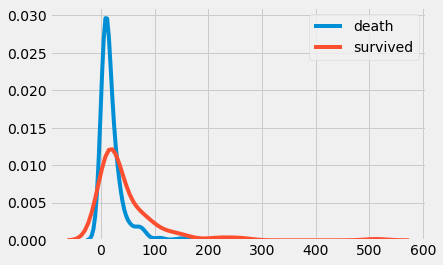

In [ ]:
sns.kdeplot(train.loc[train['Survived']==0]['Fare'],label='death')
sns.kdeplot(train.loc[train['Survived']==1]['Fare'],label='survived')

# 요금이 적을 때 사망률이 압도적으로 높음

In [ ]:
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [ ]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [ ]:
# 분포가 고르지 않아 cut 대신 qcut.
train['FareDivided'] = pd.qcut(train['Fare'], 4, labels = [0, 1, 2, 3]).astype(int)
train[['FareDivided', 'Survived']].groupby(['FareDivided']).mean()

,Survived
FareDivided,
0,0.197309
1,0.303571
2,0.454955
3,0.581081


In [ ]:
test['FareDivided'] = pd.qcut(test['Fare'], 4, labels = [0, 1, 2, 3]).astype(int)

# FareHigh Feature 생성

- Fare의 요금이 낮을수록 사망률이 높은 특성을 강조하자.

In [ ]:
train['FareHigh'] = train['FareDivided'].map({0:0, 1:0, 2:0, 3:1})
test['FareHigh'] = test['FareDivided'].map({0:0, 1:0, 2:0, 3:1})
train['FareHigh'].value_counts()

0    669
1    222
Name: FareHigh, dtype: int64

# Cabin

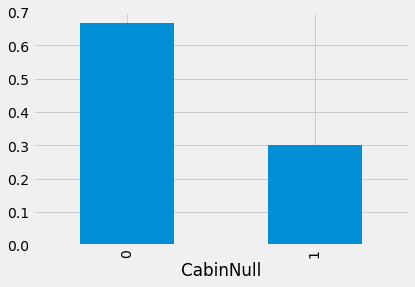

In [ ]:
for data in all_data:
    data['CabinNull'] = data['Cabin'].isnull().astype(int)

train.groupby('CabinNull')['Survived'].mean().plot.bar()

In [ ]:
for data in all_data:
    data['Cabin']=data['Cabin'].str.slice(0,1)
    data['Cabin']=data['Cabin'].map({'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6,'T':7})
    data['Cabin']=data['Cabin'].fillna(-1)

# null 값이 너무 많아 다른 특성과 비교하지 않고 null값을 채워넣자.

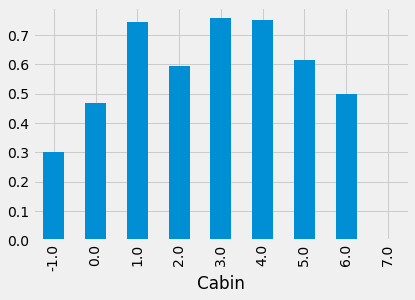

In [ ]:
train.groupby('Cabin')['Survived'].mean().plot.bar()

# Embarked

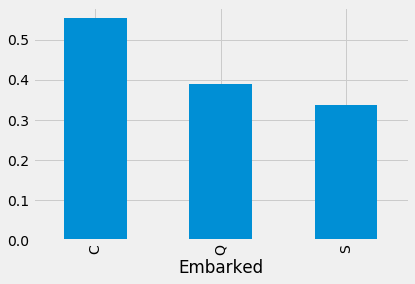

In [ ]:
train.groupby('Embarked')['Survived'].mean().plot.bar()

# C 가 생존률이 가장 높음

## Embarked null 채워넣기

In [ ]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
# 가장 많은 S 채워넣기
for data in all_data:
    data['Embarked'] = data['Embarked'].fillna('S')

train['Embarked'].isnull().sum()

0

## Embarked astype(int)

In [ ]:
for data in all_data:
    data['Embarked'] = data['Embarked'].map({ 'S':0, 'C':1, 'Q':2  })

# Name: feature engineering

In [ ]:
# Name의  .으로 끝나는 값을 추출하여 Title에 입력
for data in all_data:
    data['Title'] = data['Name'].str.extract('([A-Za-z]+)\.', expand = False)

train['Title'].value_counts()

# Mr, Miss, Mrs, Master, ... : 성별, 직업과 관련된 칭호

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Countess      1
Ms            1
Mme           1
Sir           1
Capt          1
Don           1
Jonkheer      1
Lady          1
Name: Title, dtype: int64

In [ ]:
pd.crosstab(train['Title'], train['Sex'])

Sex,0,1
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [ ]:
pd.crosstab(test['Title'], test['Sex'])

# train 데이터에는 없는 test 데이터의 Dona.

Sex,0,1
Title,,
Col,0,2
Dona,1,0
Dr,0,1
Master,0,21
Miss,78,0
Mr,0,240
Mrs,72,0
Ms,1,0
Rev,0,2


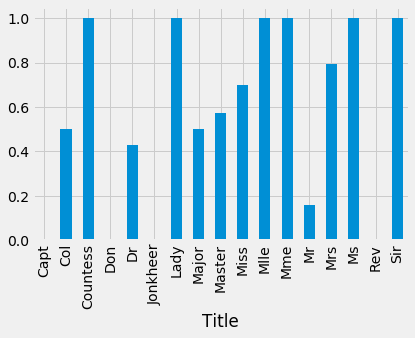

In [ ]:
train.groupby('Title')['Survived'].mean().plot.bar()

# Mr, Miss, Mrs, Master, Etc으로 카테고리 줄이기
# Master 는 나이가 어린 아이들.
# Mme 프랑스어로 부인을 뜻하는 말.
# Lady 나이든 여자를 높여 부르는 말.
# Ms 나이미상 여자.
# countess 백작부인.
# countess, Mme, Lady, Ms : Mrs
# Rev : Mr

In [ ]:
train['Age'][train['Title'] == 'Master'].describe()
# 나이가 어림

count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64

In [ ]:
train['Age'][train['Title'] == 'Dr'].describe()

count     6.000000
mean     42.000000
std      12.016655
min      23.000000
25%      35.000000
50%      46.500000
75%      49.750000
max      54.000000
Name: Age, dtype: float64

In [ ]:
train['Age'][train['Title'] == 'Lady'].describe()

count     1.0
mean     48.0
std       NaN
min      48.0
25%      48.0
50%      48.0
75%      48.0
max      48.0
Name: Age, dtype: float64

In [ ]:
train['Age'][train['Title'] == 'Rev'].describe()

count     6.000000
mean     43.166667
std      13.136463
min      27.000000
25%      31.500000
50%      46.500000
75%      53.250000
max      57.000000
Name: Age, dtype: float64

In [ ]:
train['Age'][train['Title'] == 'Don'].describe()

count     1.0
mean     40.0
std       NaN
min      40.0
25%      40.0
50%      40.0
75%      40.0
max      40.0
Name: Age, dtype: float64

In [ ]:
train['Age'][train['Title'] == 'Capt'].describe()

count     1.0
mean     70.0
std       NaN
min      70.0
25%      70.0
50%      70.0
75%      70.0
max      70.0
Name: Age, dtype: float64

In [ ]:
train['Age'][train['Title'] == 'Jonkheer'].describe()

count     1.0
mean     38.0
std       NaN
min      38.0
25%      38.0
50%      38.0
75%      38.0
max      38.0
Name: Age, dtype: float64

In [ ]:
train['Age'][train['Title'] == 'Mlle'].describe()

count     2.0
mean     24.0
std       0.0
min      24.0
25%      24.0
50%      24.0
75%      24.0
max      24.0
Name: Age, dtype: float64

In [ ]:
train['Age'][train['Title'] == 'Col'].describe()

count     2.000000
mean     58.000000
std       2.828427
min      56.000000
25%      57.000000
50%      58.000000
75%      59.000000
max      60.000000
Name: Age, dtype: float64

In [ ]:
test['Age'][test['Title'] == 'Dona'].describe()

count     1.0
mean     39.0
std       NaN
min      39.0
25%      39.0
50%      39.0
75%      39.0
max      39.0
Name: Age, dtype: float64

In [ ]:
for data in all_data:
    data['Title'] = data['Title'].replace('Mlle', 'Miss')
    data['Title'] = data['Title'].replace('Lady', 'Mrs')
    data['Title'] = data['Title'].replace('Countess', 'Mrs')
    data['Title'] = data['Title'].replace('Mme', 'Mrs')
    data['Title'] = data['Title'].replace('Ms', 'Mrs')
    data['Title'] = data['Title'].replace('Rev', 'Mr')
    data['Title'] = data['Title'].replace('Don', 'Mr')
    data['Title'] = data['Title'].replace('Capt', 'Mr')
    data['Title'] = data['Title'].replace('Jonkheer', 'Mr')
    data['Title'] = data['Title'].replace('Sir', 'Mr')
    data['Title'] = data['Title'].replace('Major', 'Mr')
    data['Title'] = data['Title'].replace('Col', 'Mr')
test['Title'] = test['Title'].replace('Dona', 'Miss')

In [ ]:
train['Title'].value_counts()

Mr        531
Miss      184
Mrs       129
Master     40
Dr          7
Name: Title, dtype: int64

In [ ]:
test['Title'].value_counts()

Mr        244
Miss       79
Mrs        73
Master     21
Dr          1
Name: Title, dtype: int64

In [ ]:
train['Title'].value_counts().shape

(5,)

In [ ]:
# Title의 값들을 순서대로 정렬해보자.
title_map = {}
l1 = [0, 1, 2, 3, 4]
for i, j in enumerate(list(train['Title'].value_counts().index)):
    val = l1[i]
    title_map[j] = val

print(title_map)

for data in all_data:
    data['Title'] = data['Title'].map(title_map)


train.head()

{'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4}


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,FirstName,FareDivided,FareHigh,CabinNull,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,-1.0,0,2,0,38,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2.0,1,2,0,-1,3,1,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,-1.0,0,1,1,-1,1,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2.0,0,2,0,8,3,1,0,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,-1.0,0,1,1,125,1,0,1,0


# Age: feature engineering

null 값이 전체의 4분의 1이나 되므로 평균이 아니라 중앙값 사용.

나이에 따라 호칭을 다르게 하므로 호칭에 따라 중앙값을 null에 입력하자.

{'Mr': 0, 'Miss': 1, 'Mrs': 2, 'Master': 3, 'Dr': 4, 'Rev': 4, 'Mlle': 4, 'Major': 4, 'Col': 4, 'Don': 4, 'Capt': 4, 'Sir': 4, 'Jonkheer': 4}

- 남자인 경우 Mr의 중앙값.
- 여자인 경우
    1. Miss인 경우 Miss 의 중앙값.
    2. Mrs인 경우 Mrss의 중앙값.
- 나머지는 나머지의 중앙값.

In [ ]:
# Title이 0 일때 나이의 분포를 알고 싶다...
train['Age'][train['Title'] == 0].describe()

count    412.00000
mean      32.89199
std       12.97761
min       11.00000
25%       23.00000
50%       30.00000
75%       40.00000
max       80.00000
Name: Age, dtype: float64

In [ ]:
train['Age'][train['Title'] == 1].describe()

count    148.000000
mean      21.804054
std       12.904198
min        0.750000
25%       14.375000
50%       21.000000
75%       30.000000
max       63.000000
Name: Age, dtype: float64

In [ ]:
train['Age'][train['Title'] == 2].describe()

count    112.000000
mean      35.803571
std       11.368392
min       14.000000
25%       27.750000
50%       35.000000
75%       44.000000
max       63.000000
Name: Age, dtype: float64

In [ ]:
train['Age'][train['Title'] == 3].describe()

count    36.000000
mean      4.574167
std       3.619872
min       0.420000
25%       1.000000
50%       3.500000
75%       8.000000
max      12.000000
Name: Age, dtype: float64

In [ ]:
train['Age'][train['Title'] == 4].describe()

count     6.000000
mean     42.000000
std      12.016655
min      23.000000
25%      35.000000
50%      46.500000
75%      49.750000
max      54.000000
Name: Age, dtype: float64

In [ ]:
all_data = [train, test]

In [ ]:
for data in all_data:
    # 남자
    guess_male_age = int(data[data['Title'] == 0]['Age'].dropna().median())
    data.loc[(data['Age'].isnull()) & (data['Title'] == 0), 'Age'] = guess_male_age
    # 여자 Miss
    guess_Miss = data[data['Title'] == 1]['Age'].dropna()
    guess_Miss_age = int(guess_Miss.median())
    data.loc[(data['Age'].isnull()) & (data['Title'] == 1), 'Age'] = guess_Miss_age
    # 여자 Mrs
    guess_Mrs = data[data['Title'] == 2]['Age'].dropna()
    guess_Mrs_age = int(guess_Mrs.median())
    data.loc[(data['Age'].isnull()) & (data['Title'] == 2), 'Age'] = guess_Mrs_age
    # 아이들 Master
    guess_Master = data[data['Title'] == 3]['Age'].dropna()
    guess_Master_age = int(guess_Master.median())
    data.loc[(data['Age'].isnull()) & (data['Title'] == 3), 'Age'] = guess_Master_age
    # Etc
    guess_Etc = data[data['Title'] == 4]['Age'].dropna()
    guess_Etc_age = int(guess_Etc.median())
    data.loc[(data['Age'].isnull()) & (data['Title'] == 4), 'Age'] = guess_Etc_age

train['Age'].isnull().sum()

0

In [ ]:
all_data = [train, test]

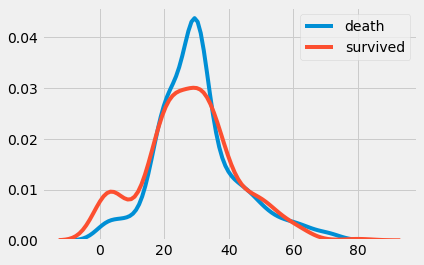

In [ ]:
sns.kdeplot(train.loc[train['Survived']==0]['Age'],label='death')
sns.kdeplot(train.loc[train['Survived']==1]['Age'],label='survived')

In [ ]:
train['Age'].describe()

count    891.000000
mean      29.387396
std       13.269035
min        0.420000
25%       21.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
train['AgeDivided'] = pd.cut(train['Age'], 5, labels = [0, 1, 2, 3, 4]).astype(int)
train[['AgeDivided', 'Survived']].groupby(['AgeDivided']).mean().sort_values(['Survived'], ascending = False)

,Survived
AgeDivided,
0,0.548077
2,0.436893
3,0.434783
1,0.327345
4,0.090909


In [ ]:
test['AgeDivided'] = pd.cut(test['Age'], 5, labels = [0, 1, 2, 3, 4]).astype(int)

# Ticket: feature engineering

- Ticket은 Pclass와 Embarked에 따라 이름을 다르게 설정할 것!

## Ticket - Pclass

In [ ]:
# 특징이 많이 보임.
pd.crosstab(train['Ticket'], train['Pclass'])

Pclass,1,2,3
Ticket,,,
110152,3,0,0
110413,3,0,0
110465,2,0,0
110564,1,0,0
110813,1,0,0
111240,1,0,0
111320,1,0,0
111361,2,0,0
111369,1,0,0


In [ ]:
Ticket_Pclass = pd.crosstab(train['Ticket'], train['Pclass'])
Ticket_Pclass[Ticket_Pclass[1] > 0][1]

Ticket
110152         3
110413         3
110465         2
110564         1
110813         1
111240         1
111320         1
111361         2
111369         1
111426         1
111427         1
111428         1
112050         1
112052         1
112053         1
112058         1
112059         1
112277         1
112379         1
113028         1
113043         1
113050         1
113051         1
113055         1
113056         1
113059         1
113501         1
113503         1
113505         2
113509         1
              ..
PC 17572       3
PC 17582       3
PC 17585       1
PC 17590       1
PC 17592       1
PC 17593       2
PC 17595       1
PC 17596       1
PC 17597       1
PC 17599       1
PC 17600       1
PC 17601       1
PC 17603       1
PC 17604       2
PC 17605       1
PC 17608       2
PC 17609       1
PC 17610       1
PC 17611       2
PC 17612       1
PC 17754       1
PC 17755       3
PC 17756       1
PC 17757       4
PC 17758       2
PC 17759       1
PC 17760       3
PC 1776

In [ ]:
Ticket_Pclass[Ticket_Pclass[2] > 0][2]

Ticket
11668               2
12233               1
2003                1
211536              1
218629              1
219533              1
220367              1
220845              2
223596              1
226593              1
226875              1
228414              1
229236              1
230080              3
230136              2
230433              2
230434              1
231919              2
231945              1
233639              1
233866              1
234360              1
234604              1
234686              1
234818              1
236171              1
236852              1
236853              1
237442              1
237565              1
                   ..
C.A. 33595          1
C.A. 34260          1
C.A. 34651          3
C.A./SOTON 34068    1
F.C.C. 13528        1
F.C.C. 13529        3
F.C.C. 13531        1
P/PP 3381           2
S.C./PARIS 2079     2
S.O./P.P. 3         2
S.O.C. 14879        5
S.O.P. 1166         1
S.W./PP 752         1
SC 1748             1
SC/

In [ ]:
Ticket_Pclass[Ticket_Pclass[3] > 0][3]

Ticket
12460                1
14311                1
14312                1
14313                1
14973                1
1601                 7
21440                1
2223                 1
2620                 1
2623                 1
2624                 1
2625                 1
2626                 1
2627                 2
2628                 1
2629                 1
2631                 1
2641                 1
2647                 1
2648                 1
2649                 1
2650                 1
2651                 2
2653                 2
2659                 2
2661                 2
2662                 1
2663                 1
2664                 1
2665                 2
                    ..
SOTON/O.Q. 392087    1
SOTON/O2 3101272     1
SOTON/O2 3101287     1
SOTON/OQ 3101316     1
SOTON/OQ 3101317     1
SOTON/OQ 392076      1
SOTON/OQ 392082      1
SOTON/OQ 392086      1
SOTON/OQ 392089      1
SOTON/OQ 392090      1
STON/O 2. 3101269    1
STON/O 2. 3101273    1
STON

In [ ]:
train['Ticket3'] = train['Ticket'].str.slice(0, 3)
Tickets3 = pd.crosstab(train['Ticket3'], train['Pclass'])
Tickets3[Tickets3[1] > 0][1]

Ticket3
110    10
111     8
112     7
113    47
117    11
118     1
119     2
127     2
130     1
132     2
135     8
169     3
174    12
177     1
198     2
199    14
241     3
270     1
336     1
352     5
369     8
572     1
693     1
695     1
F.C     1
PC     60
W.E     1
WE/     2
Name: 1, dtype: int64

In [ ]:
Tickets3[Tickets3[2] > 0][2]

Ticket3
116     2
122     1
200     1
211     1
218     1
219     1
220     3
223     1
226     2
228     1
229     1
230     8
231     3
233     2
234     4
236     3
237     8
239     8
240     1
243     3
244    10
248    12
250    14
263     2
267     1
272     1
278     1
281     1
282     4
284     4
285     1
286     2
290     3
291     7
292     1
297     3
310     3
314     1
342     1
C.A    20
F.C     5
P/P     2
S.C     2
S.O     8
S.W     1
SC      1
SC/    12
SCO     1
SO/     1
SW/     1
W./     2
W/C     1
Name: 2, dtype: int64

In [ ]:
Tickets3[Tickets3[3] > 0][3]
# C.A, W./ ,

Ticket3
124     1
143     3
149     1
160     7
214     1
222     1
262     9
263     1
264     4
265     7
266    15
267     6
268     6
269     9
270     1
310    16
312     3
315    14
323     2
324     1
330    11
334     1
335     2
336     1
341     2
342     1
343     4
345    19
346     1
347    48
       ..
653     3
656     1
726     1
753     2
754     3
755     2
759     1
847     2
923     1
A./     2
A.5     2
A/4     6
A/5    17
A/S     1
A4.     1
C 1     1
C 4     1
C 7     3
C.A     8
CA      6
CA.     8
Fa      1
LIN     4
PP      3
S.C     1
S.O     1
S.P     1
SOT    17
STO    18
W./     7
Name: 3, Length: 85, dtype: int64

## Ticket - Embarked

In [ ]:
Ticket_Embarked = pd.crosstab(train['Ticket3'], train['Embarked'])
Ticket_Embarked

Embarked,0,1,2
Ticket3,,,
110,9,1,0
111,4,4,0
112,5,2,0
113,43,4,0
116,2,0,0
117,5,6,0
118,0,1,0
119,0,2,0
122,1,0,0


In [ ]:
# 문자가 들어간 티켓이 많음
Ticket_Embarked[Ticket_Embarked[1] > 0][1]

Ticket3
110     1
111     4
112     2
113     4
117     6
118     1
119     2
130     1
132     2
135     2
169     2
174     6
177     1
237     2
262     9
263     1
264     4
265     7
266    15
267     6
268     6
269     9
270     1
341     1
349     7
352     3
369     2
P/P     2
PC     46
S.C     2
SC      1
SC/    10
Name: 1, dtype: int64

In [ ]:
Ticket_Embarked[Ticket_Embarked[2] > 0][2]

Ticket3
124     1
143     3
199     2
219     1
226     1
234     1
330    11
334     1
335     2
336     1
358     2
362     1
364     6
365     3
367     9
368     5
370    10
371     4
372     1
382     7
383     1
384     1
394     1
923     1
A/5     1
Name: 2, dtype: int64

In [ ]:
Ticket_Embarked[Ticket_Embarked[0] > 0][0]

Ticket3
110     9
111     4
112     5
113    43
116     2
117     5
122     1
127     2
135     6
149     1
160     7
169     1
174     6
198     2
199    12
200     1
211     1
214     1
218     1
220     3
222     1
223     1
226     1
228     1
229     1
230     8
231     3
233     2
234     3
236     3
       ..
A.5     2
A/4     6
A/5    16
A/S     1
A4.     1
C 1     1
C 4     1
C 7     3
C.A    28
CA      6
CA.     8
F.C     6
Fa      1
LIN     4
PC     14
PP      3
S.C     1
S.O     9
S.P     1
S.W     1
SC/     2
SCO     1
SO/     1
SOT    17
STO    18
SW/     1
W./     9
W.E     1
W/C     1
WE/     2
Name: 0, Length: 126, dtype: int64

# TicketDivided feature 생성

In [ ]:
for data in all_data:
    data['TicketDivided'] = data.loc[(data['Pclass'] == 1) & (data['Embarked'] == 0), 'Ticket'] = 0
    data['TicketDivided'] = data.loc[(data['Pclass'] == 2) & (data['Embarked'] == 0), 'Ticket'] = 1
    data['TicketDivided'] = data.loc[(data['Pclass'] == 3) & (data['Embarked'] == 0), 'Ticket'] = 2
    data['TicketDivided'] = data.loc[(data['Pclass'] == 1) & (data['Embarked'] == 1), 'Ticket'] = 3
    data['TicketDivided'] = data.loc[(data['Pclass'] == 2) & (data['Embarked'] == 1), 'Ticket'] = 4
    data['TicketDivided'] = data.loc[(data['Pclass'] == 3) & (data['Embarked'] == 1), 'Ticket'] = 5
    data['TicketDivided'] = data.loc[(data['Pclass'] == 1) & (data['Embarked'] == 2), 'Ticket'] = 6
    data['TicketDivided'] = data.loc[(data['Pclass'] == 2) & (data['Embarked'] == 2), 'Ticket'] = 7
    data['TicketDivided'] = data.loc[(data['Pclass'] == 3) & (data['Embarked'] == 2), 'Ticket'] = 8

all_data = [train, test]
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,FirstName,FareDivided,FareHigh,CabinNull,Title,AgeDivided,Ticket3,TicketDivided
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,7.2500,-1.0,0,2,0,38,0,0,1,0,1,A/5,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3,71.2833,2.0,1,2,0,-1,3,1,0,2,2,PC,8
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,7.9250,-1.0,0,1,1,-1,1,0,1,1,1,STO,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,0,53.1000,2.0,0,2,0,8,3,1,0,2,2,113,8
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,8.0500,-1.0,0,1,1,125,1,0,1,0,2,373,8


# Is_young 속성 추가하기

In [ ]:
# 12세로 설정한 이유는 Master의 max가 12세였음.
train['Is_young']=((train['Age']<=12)&(train['Age']>=0)).astype(int)
test['Is_young']=((test['Age']<=12)&(test['Age']>=0)).astype(int)

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Alone,FirstName,FareDivided,FareHigh,CabinNull,Title,AgeDivided,Ticket3,TicketDivided,Is_young
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,2,7.2500,-1.0,0,2,0,38,0,0,1,0,1,A/5,8,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,3,71.2833,2.0,1,2,0,-1,3,1,0,2,2,PC,8,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,2,7.9250,-1.0,0,1,1,-1,1,0,1,1,1,STO,8,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,0,53.1000,2.0,0,2,0,8,3,1,0,2,2,113,8,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,2,8.0500,-1.0,0,1,1,125,1,0,1,0,2,373,8,0


# 예측하기

In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Alone',
       'FirstName', 'FareDivided', 'FareHigh', 'CabinNull', 'Title',
       'AgeDivided', 'Ticket3', 'TicketDivided', 'Is_young'],
      dtype='object')

In [ ]:
X_train = train[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Alone',
       'FirstName', 'FareDivided', 'FareHigh', 'CabinNull', 'Title',
       'AgeDivided', 'TicketDivided', 'Is_young']]
y_train = train['Survived']


X_test = test[['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'Alone',
       'FirstName', 'FareDivided', 'FareHigh', 'CabinNull', 'Title',
       'AgeDivided', 'TicketDivided', 'Is_young']]


random_forest = RandomForestClassifier( max_depth=7 , max_features=4 , n_estimators=1400 )
random_forest.fit(X_train,y_train)

test['Survived']=random_forest.predict_proba(X_test)[:,1]

test[['PassengerId','Survived']].to_csv("dacon_baseline.csv",index=False)



# 피드백

최인영님의 점수는 상위 25.6% 입니다.

최인영님의 제출 수는 상위 16.3% 입니다.

대부분의 학생들보다 많은 실험과 검증 그리고 데이터에 대한 깊은 생각을 하신 것 같습니다. 또한 영상에서 보여 준 시각화 외에도 다양한 시각화를 하셨고 데이터에 대한 깊은 생각도 해본 것이 인상 깊습니다.

다만, 굳이 부족한 부분을 한가지 뽑자면 필요없는 셀들이 남아있는 것이 보입니다.  최종적으로 쓸모있는 변수들을 더 쉽고 정확하게 골라내기 위하여 정리만 살짝 추가해주시면 더욱 완벽한 데이터 사이언티스트가 되실 수 있으실 것 같습니다

고생하셨습니다 :)


## 1.Data Cleansing
100%
## 2.Visualization
100%
## 3.Feature Engineering
100%
## 4.Model Building
100%
